In [67]:
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats
import statsmodels.api as sm

<BR>

## Task 3

In [17]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'

In [18]:
df=pd.read_csv(boston_url)

In [19]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [24]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<BR>

## Task 4

#### For the "Median value of owner-occupied homes" provide a boxplot

<AxesSubplot:xlabel='MEDV'>

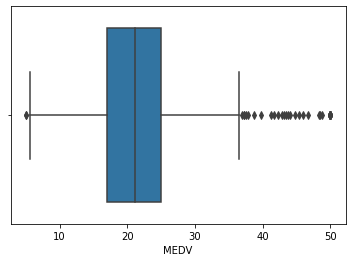

In [26]:
sns.boxplot(x='MEDV', data = df)

<BR>

#### Provide a  bar plot for the Charles river variable

<AxesSubplot:xlabel='CHAS', ylabel='count'>

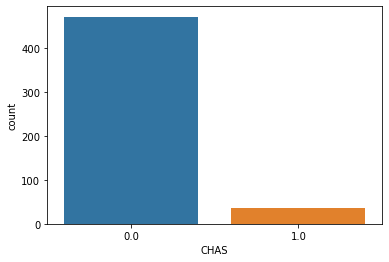

In [40]:
sns.countplot(x = df.CHAS)

<BR>

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [46]:
df.loc[(df['AGE'] <= 35), 'age_group'] = '35 years and younger'
df.loc[(df['AGE'] > 35)&(df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
df.loc[(df['AGE'] >= 70), 'age_group'] = '70 years and older'

In [47]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,age_group
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years


<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

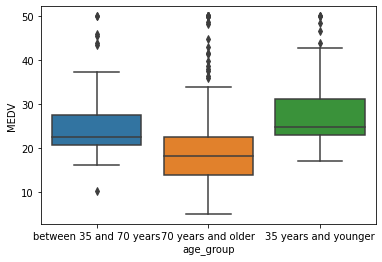

In [48]:
sns.boxplot(x = 'age_group', y = 'MEDV', data = df)

<BR>

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

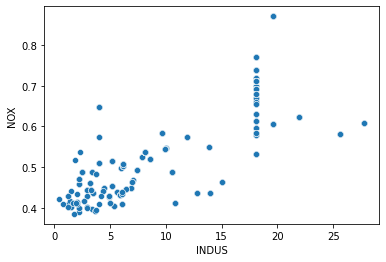

In [49]:
sns.scatterplot(x = 'INDUS', y = 'NOX', data = df)

<BR>

<BR>

#### Create a histogram for the pupil to teacher ratio variable



<AxesSubplot:xlabel='PTRATIO', ylabel='Count'>

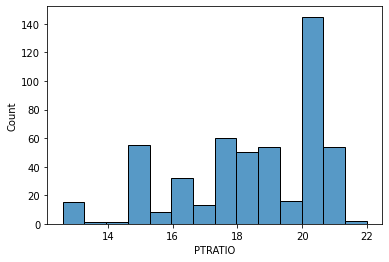

In [50]:
sns.histplot(x = 'PTRATIO', data = df)

<BR>

## Task 5

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis: There is no difference in the Median value of houses (MEDV) for houses bounded by the Charles river (CHAS)\
Alternate Hypothesis: There is a difference in MEDV for houses bound by Charles river

In [57]:
scipy.stats.ttest_ind( df[df['CHAS'] == 1.0]['MEDV'], df[df['CHAS'] == 0.0]['MEDV'] )

Ttest_indResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05)

Since the p-value is less than α (0.05), we will reject the null hypothesis as there is enough evidence that there is a statistical difference in Median value of houses based on Charles river.

<BR>

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypothesis: Median value of houses (MEDV) does not differ with the proportion of owner occupied units built prior to 1940 (AGE)\
Alternate Hypothesis: At least one of the values is different

In [61]:
f_statistic, p_value = scipy.stats.f_oneway(df.loc[(df['age_group'] == '35 years and younger')]['MEDV'], 
                                            df.loc[(df['age_group'] == 'between 35 and 70 years')]['MEDV'], 
                                            df.loc[(df['age_group'] == '70 years and older')]['MEDV'])
print('F_Statistic: {0}, P-Value: {1}'.format(f_statistic, p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


As the P-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the median values differ.

<BR>

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis: There exists no relationship between Nitric Oxide concentrations (NOX) and proportion of non-retail business acress per town (INDUS)\
Alternate Hypothesis: There exists a relationship between NOX and INDUS

In [63]:
scipy.stats.pearsonr(df['NOX'], df['INDUS'])

(0.7636514469209161, 7.913361061230596e-98)

Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric Oxide Concentrations and proportion of Non-retail acress per town. 

<BR>

#### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null Hypothesis: There exists no relationship between the weighted distance to the five Boston employment centers(DIS) on the median value of owner occupied homes (MEDV)\
Alternate Hypothesis: There exists a relationship between DIS and MEDV

In [68]:
X = sm.add_constant(df['DIS'])
y = df['MEDV']

In [71]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

In [72]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.21e-08
Time:                        12:53:00   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We observe that the p-value (1.21e-08) is less than 0.05. This means that we can reject the null hypothesis and conclude that there is an impact of the weighted distance to Boston employement centers on the Median Value of owner occupied home (MEDV).